# Derivitives - Put and Call Contracts

1. Long call: Buyer of a call option - long asset exposure
2. Short call: Writer of a call option - short asset exposure
3. Long put: Writer of a put option - long asset exposure
4. Short put: Buyer of a put option - short asset exposure

### Import Required Packages

In [1]:
import numpy_financial as np
from matplotlib import pyplot as plt

In [2]:
# Generate a list of potential stock values from which to estimate the resulting profit/loss
stock_price = [price for price in range(0,200,1)]

In [3]:
# Specify Variables
quantity = 100
current_price = 100
strike_price = 95
put_premium = 1
call_premium = 9.64

# Call Options

### 1. Long Call
Buyer has the right to buy shares at a specific price

In [4]:
long_call_profit = []

for price in stock_price:
    profit = (price * quantity) - ((strike_price + call_premium) * quantity)
    
    max_cost = (quantity * call_premium) * -1
    
    if profit <= max_cost:
        long_call_profit.append(max_cost)
    else: long_call_profit.append(profit)

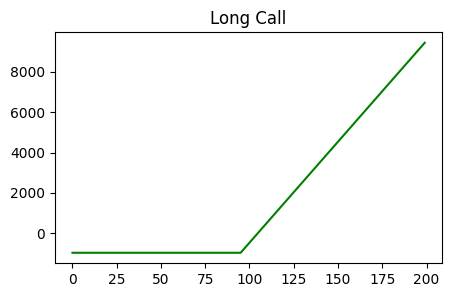

In [5]:
plt.figure(figsize = (5,3))
plt.title('Long Call')
plt.plot(stock_price,long_call_profit, color = 'green')

### 2. Short Call
Writer has the obligation to deliver shares at a specific price

In [6]:
short_call_profit = []

for price in stock_price:
    profit = ((strike_price + call_premium) * quantity) - (price * quantity)
    
    max_profit = (quantity * call_premium)
    
    if profit >= max_profit:
        short_call_profit.append(max_profit)
    else: short_call_profit.append(profit)

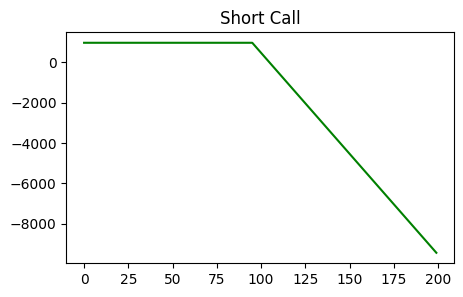

In [7]:
plt.figure(figsize = (5,3))
plt.title('Short Call')
plt.plot(stock_price,short_call_profit, color = 'green')

# Put Options

### 3. Long Put 
- Buyer has the option to sell the stock at the strike price

In [8]:
long_put_profit = []

for price in stock_price:
    profit = (strike_price * quantity) - ((price + put_premium) * quantity)
    
    max_loss = (quantity * put_premium) * -1
    
    if profit < max_loss:
        long_put_profit.append(max_loss)
    else: long_put_profit.append(profit)

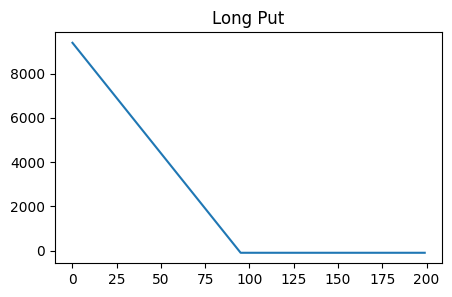

In [9]:
plt.figure(figsize = (5,3))
plt.title('Long Put')
plt.plot(stock_price,long_put_profit)

### 4.Short Put 
- The writer has the obligation to buy the stock at the strike price

In [10]:
short_put_profit = []

for price in stock_price:
    profit = ((price + put_premium) * quantity) - (strike_price * quantity)
    
    max_profit = (quantity * put_premium)
    
    if profit >= max_profit:
        short_put_profit.append(max_profit)
    else: short_put_profit.append(profit)

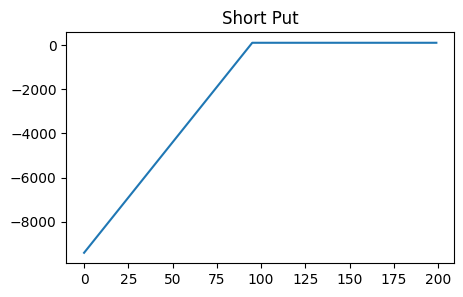

In [11]:
plt.figure(figsize = (5,3))
plt.title('Short Put')
plt.plot(stock_price,short_put_profit)

### Visualize all Four Option Positions

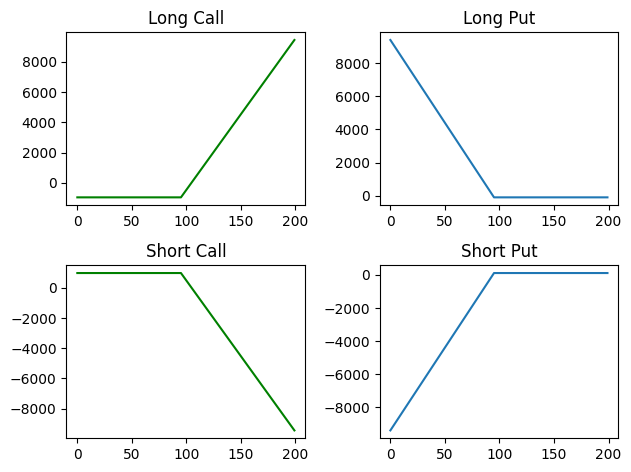

In [12]:
fig, ax = plt.subplots(2,2)

ax[0,0].plot(stock_price,long_call_profit, color = 'green')
ax[0,0].set_title('Long Call')
ax[1,0].plot(stock_price,short_call_profit, color = 'green')
ax[1,0].set_title('Short Call')
ax[0,1].plot(stock_price,long_put_profit)
ax[0,1].set_title('Long Put')
ax[1,1].plot(stock_price,short_put_profit)
ax[1,1].set_title('Short Put')

fig.tight_layout(pad = 1.0)

plt.show()

### Long Stock Position

In [13]:
long_stock_profit = []

for price in stock_price:
    profit = quantity * (price - current_price)
    long_stock_profit.append(profit)

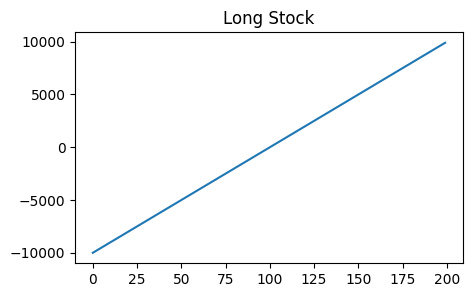

In [14]:
plt.figure(figsize = (5,3))
plt.title('Long Stock')
plt.plot(stock_price,long_stock_profit)

# Derivitive Strategies

Potential stratgies of combining various positions, not to be used as financial advise

### Covered Call
- Combination of a long stock position, and a short call position

In [15]:
covered_call_profit = []

for i in range(0,len(stock_price),1):
    profit = long_stock_profit[i] + short_call_profit[i]
    
    covered_call_profit.append(profit)

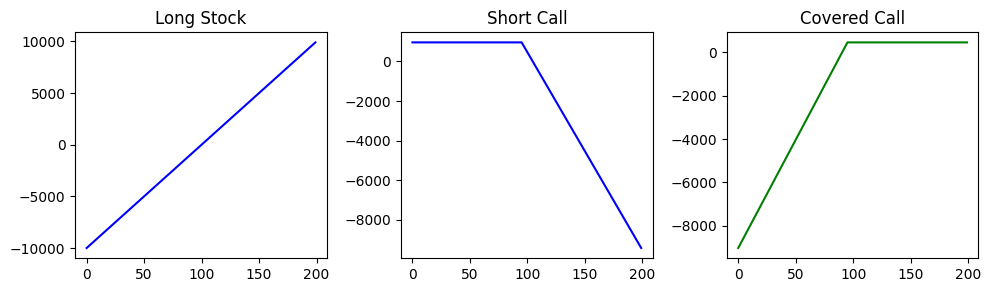

In [16]:
fig, ax = plt.subplots(1,3, figsize = (10,3))

ax[0].plot(stock_price,long_stock_profit, color = 'blue')
ax[0].set_title('Long Stock')
ax[1].plot(stock_price,short_call_profit, color = 'blue')
ax[1].set_title('Short Call')
ax[2].plot(stock_price,covered_call_profit, color = 'green')
ax[2].set_title('Covered Call')

fig.tight_layout(pad = 1.0)

plt.show()

### Married Put
- Combination of a long stock position, and a long put position

In [17]:
married_put_profit = []

for i in range(0,len(stock_price),1):
    profit = long_stock_profit[i] + long_put_profit[i]
    
    married_put_profit.append(profit)

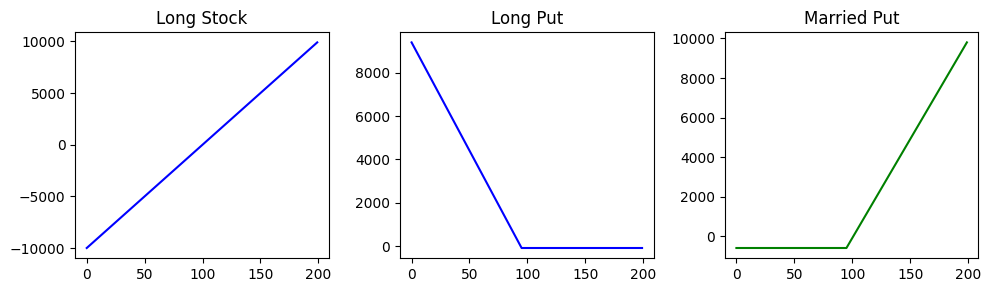

In [18]:
fig, ax = plt.subplots(1,3, figsize = (10,3))

ax[0].plot(stock_price,long_stock_profit, color = 'blue')
ax[0].set_title('Long Stock')
ax[1].plot(stock_price,long_put_profit, color = 'blue')
ax[1].set_title('Long Put')
ax[2].plot(stock_price,married_put_profit, color = 'green')
ax[2].set_title('Married Put')

fig.tight_layout(pad = 1.0)

plt.show()